In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-1hja4c3w because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
sns.set(style="ticks", font_scale=1.5, font="Liberation Sans")
ANNOT = False
SUFFIX = "annot" if ANNOT else "no-annot"

def render(file_name):
    plt.savefig(f"{file_name}", dpi=300, bbox_inches="tight")
    print(f"Rendered figure to {file_name}")

# Cross-scale

In [3]:
vt = pd.read_csv("../cross-scale/human_data/vt16/stimuli_v3.csv")
vt.head()

,scale_id,weak_scalemate,strong_scalemate,weak_inflected,strong_inflected,si_neutral,si_nonneutral,cloze_neutral,cloze_nonneutral,category,frequency,lsa,distance,boundedness,neutral_scalar_construction,nonneutral1_scalar_construction,nonneutral2_scalar_construction,nonneutral3_scalar_construction,adj,pos
0,adequate/good,adequate,good,adequate,good,29,32,33,57,O,-1.52,0.27,3.52,0,"it is adequate, but not good.","the food is adequate, but not good.","the salary is adequate, but not good.","the solution is adequate, but not good.",1,adj
1,allowed/obligatory,allowed,obligatory,allowed,obligatory,67,82,20,47,O,-0.85,0.02,5.35,1,"it is allowed, but not obligatory.","copying is allowed, but not obligatory.","drinking is allowed, but not obligatory.","talking is allowed, but not obligatory.",1,adj
2,attractive/stunning,attractive,stunning,attractive,stunning,8,21,53,72,O,0.37,0.07,5.78,0,"she is attractive, but not stunning.","that nurse is attractive, but not stunning.","this model is attractive, but not stunning.","the singer is attractive, but not stunning.",1,adj
3,believe/know,believe,know,believes,knows,21,61,67,67,O,-0.70,0.46,5.04,1,"she believes it, but does not know it.","the student believes it, but does not know it.","the mother believes it, but does not know it.","the teacher believes it, but does not know it.",0,verb
4,big/enormous,big,enormous,big,enormous,17,21,83,37,O,1.13,0.21,5.43,0,"it is big, but not enormous.","that elephant is big, but not enormous.","the house is big, but not enormous.","that tree is big, but not enormous.",1,adj


Rendered figure to cross-scale_no-annot.pdf


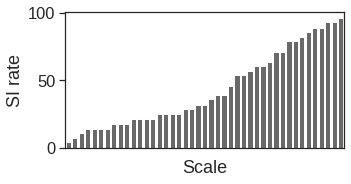

In [9]:
order = vt.sort_values(by="si_nonneutral").scale_id
ax = sns.barplot(data=vt, y="si_nonneutral", x="scale_id", order=order, color="dimgrey") #palette="magma_r")
ax.set_ylabel("SI rate")
ax.set_xticks([])
ax.set_xlabel("Scale", labelpad=12)

if ANNOT:
    # Bottom arrow
    LABEL_COLOR = "cornflowerblue"
    ax.annotate(
        '', xy=(0, -0.35), xycoords='axes fraction', xytext=(1, -0.35), 
        arrowprops=dict(arrowstyle="<|-|>", color=LABEL_COLOR, lw=5)
    )
    ax.text(
        0.5, -0.52, "Variation across scales", color=LABEL_COLOR, size=22,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes
    )

    # Annotate with examples and arrows
    ax.annotate(
        "$\\bf{Low\; SI}$\nThe painting is ugly\nThe painting is not hideous", 
        xy=(50,30), xycoords='axes points', xytext=(-110, 180), bbox=dict(boxstyle="round", fc="#f2f2f2"),
        arrowprops=dict(color='k', headlength=10, headwidth=10, width=3)
    )
    ax.annotate(
        # leave space for the tikz annotation
        "$\\bf{High\; SI}$\nSuccess is possible          \nSuccess is not certain",  
        xy=(262,130), xycoords='axes points', xytext=(160, 180), bbox=dict(boxstyle="round", fc="#f2f2f2"),
        arrowprops=dict(color='k', headlength=10, headwidth=10, width=3)
    )
    
# Render
plt.gcf().set_size_inches(5,2.5)
render(f"cross-scale_{SUFFIX}.pdf")

# Within-scale

In [5]:
d = pd.read_csv("../within-scale/data/some-all/some_database.tsv", sep="\t").drop_duplicates()
d.head()

,Item,workerid,Rating,Partitive,StrengthSome,Mention,Subjecthood,Modification,Sentence,SentenceLength,Trial
0,176651:43,22,5,yes,5.7,new,other,modified,"a, a contractor friend helped me, uh, with som...",14,1
1,176651:43,25,4,yes,5.7,new,other,modified,"a, a contractor friend helped me, uh, with som...",14,1
2,176651:43,33,7,yes,5.7,new,other,modified,"a, a contractor friend helped me, uh, with som...",14,1
3,176651:43,9,3,yes,5.7,new,other,modified,"a, a contractor friend helped me, uh, with som...",14,1
4,176651:43,18,7,yes,5.7,new,other,modified,"a, a contractor friend helped me, uh, with som...",14,1


Rendered figure to within-scale_no-annot.pdf


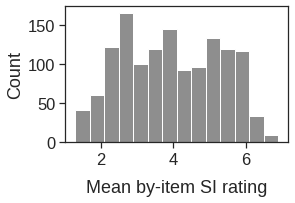

In [10]:
g = d.groupby("Item").Rating.mean()
ax = sns.histplot(g, color="dimgrey")
ax.set_xlabel("Mean by-item SI rating", labelpad=12)
ax.set_xticks([2,4,6])

if ANNOT:
    # Bottom arrow
    LABEL_COLOR = "cornflowerblue"
    ARROW_STYLE = dict(arrowstyle="<|-|>", color=LABEL_COLOR, lw=5)
    ax.annotate('', xy=(0, -0.35), xycoords='axes fraction', xytext=(1, -0.35), arrowprops=ARROW_STYLE)
    ax.text(
        0.5, -0.52, "Variation within <some, all> scale", color=LABEL_COLOR, size=22,
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes
    )

    # Annotate with examples and arrows
    ax.annotate(
        "$\\bf{Low\; SI}$\nMy father got us some tickets\nMy father got us some, but not all tickets", 
        xy=(-200, 180), xycoords="axes points", xytext=(-200, 180), bbox=dict(boxstyle="round", fc="#f2f2f2")
    )
    ax.annotate(
        "$\\bf{High\; SI}$\nI like some country music\nI like some, but not all country music", 
        xy=(190, 180), xycoords="axes points", xytext=(190, 180), bbox=dict(boxstyle="round", fc="#f2f2f2")
    )
    ax.annotate(
        "", 
        xy=(60,10), xycoords='axes points', xytext=(-10, 180), bbox=dict(boxstyle="round", fc="#f2f2f2"),
        arrowprops=dict(color='k', headlength=10, headwidth=10, width=3)
    )
    ax.annotate(
        "", 
        xy=(200,10), xycoords='axes points', xytext=(240, 180), bbox=dict(boxstyle="round", fc="#f2f2f2"),
        arrowprops=dict(color='k', headlength=10, headwidth=10, width=3)
    )
    
# Render
plt.gcf().set_size_inches(4,2.5)
render(f"within-scale_{SUFFIX}.pdf")

In [7]:
d[d.Sentence.str.contains("i like some country music")].Rating.mean()

6.9

In [8]:
d[d.Sentence.str.contains("help them to appreciate some of the things that we have  here")].Rating.mean()

2.9